In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import os
import glob
IMG_SIZE = 224

In [13]:
img_dir = r"/content/drive/MyDrive/Colab Notebooks/images"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
X = []
for img in files:
    img = cv2.imread(img)
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    X.append(np.array(img))

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
X

[array([[[135, 108,  54],
         [158, 124,  45],
         [179, 146,  79],
         ...,
         [ 41,  43,  42],
         [ 43,  41,  40],
         [ 37,  36,  34]],
 
        [[128, 105,  53],
         [154, 120,  41],
         [149, 119,  53],
         ...,
         [ 46,  46,  45],
         [ 42,  44,  41],
         [ 35,  37,  34]],
 
        [[127, 108,  63],
         [153, 121,  43],
         [153, 126,  63],
         ...,
         [ 44,  41,  41],
         [ 47,  49,  45],
         [ 36,  38,  34]],
 
        ...,
 
        [[ 40,  48,  71],
         [ 41,  49,  72],
         [ 42,  50,  73],
         ...,
         [ 43,  62,  99],
         [ 46,  67, 101],
         [ 47,  67, 102]],
 
        [[ 44,  52,  75],
         [ 43,  51,  74],
         [ 41,  49,  72],
         ...,
         [ 42,  62,  99],
         [ 47,  66, 103],
         [ 48,  67, 104]],
 
        [[ 44,  52,  75],
         [ 41,  50,  73],
         [ 39,  47,  70],
         ...,
         [ 45,  64, 102],
  

In [16]:
X[0].shape

(224, 224, 3)

In [17]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMG_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMG_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMG_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMG_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [18]:
path = '/content/drive/MyDrive/Colab Notebooks/annotations/'
text_files = ['/content/drive/MyDrive/Colab Notebooks/annotations/'+ i for i in sorted(os.listdir(path))]
y = []
for i in text_files:
    y.append(resizeannotation(i))

In [19]:
resizeannotation("/content/drive/MyDrive/Colab Notebooks/annotations/Cars0.xml")

[187, 144, 101, 104]

In [20]:
y[:5]

[[187, 144, 101, 104],
 [146, 144, 75, 115],
 [169, 147, 78, 4],
 [119, 109, 98, 95],
 [134, 164, 93, 150]]

In [21]:
np.array(X).shape

(433, 224, 224, 3)

In [22]:
np.array(y).shape

(433, 4)

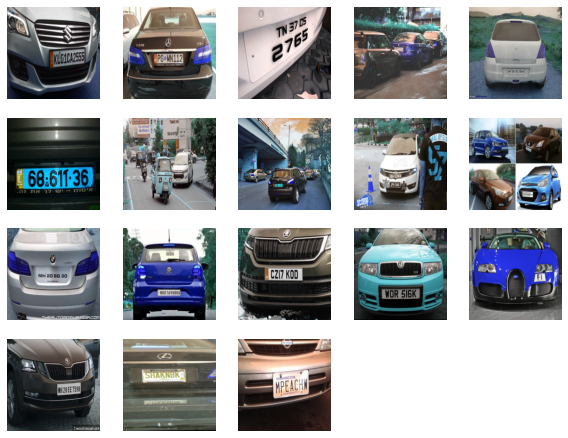

In [23]:
plt.figure(figsize=(10,20))

for i in range(0,18):
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

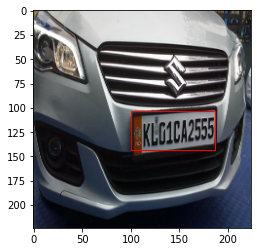

In [24]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(255, 0, 0))
plt.imshow(image)
plt.show()

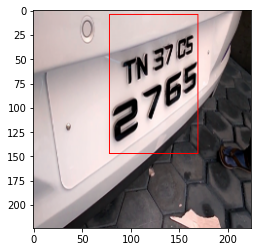

In [25]:
image = cv2.rectangle(X[2],(y[2][0],y[2][1]),(y[2][2],y[2][3]),(255, 0, 0))
plt.imshow(image)
plt.show()

In [26]:
X = np.array(X)
y = np.array(y)

In [27]:
X = X/255
y = y/255

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5)

In [29]:
X_train.shape

(173, 224, 224, 3)

In [30]:
X_test.shape

(87, 224, 224, 3)

In [31]:
from keras.models import Sequential

from keras.layers import Dense, Flatten, Dropout

from keras.applications.vgg19 import VGG19

In [32]:
X_train[0].shape

(224, 224, 3)

In [33]:
import cv2
from os import listdir,makedirs
from os.path import isfile,join

path = r'/content/drive/MyDrive/Colab Notebooks/images' # Source Folder
dstpath = r'/content/drive/MyDrive/Colab Notebooks/test' # Destination Folder

try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = [f for f in listdir(path) if isfile(join(path,f))] 

for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    except:
        print ("{} is not converted".format(image))

Directory already exist, images will be written in asme folder
Cars115.png is not converted
Cars103.png is not converted
Cars10.png is not converted
Cars130.png is not converted
Cars122.png is not converted
Cars117.png is not converted
Cars131.png is not converted
Cars112.png is not converted
Cars127.png is not converted
Cars12.png is not converted
Cars126.png is not converted
Cars106.png is not converted
Cars104.png is not converted
Cars120.png is not converted
Cars102.png is not converted
Cars108.png is not converted
Cars121.png is not converted
Cars110.png is not converted
Cars109.png is not converted
Cars0.png is not converted
Cars134.png is not converted
Cars125.png is not converted
Cars111.png is not converted
Cars13.png is not converted
Cars107.png is not converted
Cars123.png is not converted
Cars132.png is not converted
Cars114.png is not converted
Cars129.png is not converted
Cars119.png is not converted
Cars113.png is not converted
Cars136.png is not converted
Cars100.png is

In [34]:
img_dir = r"/content/drive/MyDrive/Colab Notebooks/test"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
X1 = []
for img in files:
    img = cv2.imread(img)
    X1.append(np.array(img))

In [35]:
X1

[array([[[ 63,  63,  63],
         [116, 116, 116],
         [108, 108, 108],
         ...,
         [ 39,  39,  39],
         [ 34,  34,  34],
         [ 38,  38,  38]],
 
        [[ 67,  67,  67],
         [107, 107, 107],
         [101, 101, 101],
         ...,
         [ 32,  32,  32],
         [ 42,  42,  42],
         [ 27,  27,  27]],
 
        [[ 76,  76,  76],
         [104, 104, 104],
         [ 98,  98,  98],
         ...,
         [ 35,  35,  35],
         [ 38,  38,  38],
         [ 28,  28,  28]],
 
        ...,
 
        [[ 55,  55,  55],
         [ 56,  56,  56],
         [ 57,  57,  57],
         ...,
         [ 76,  76,  76],
         [ 76,  76,  76],
         [ 76,  76,  76]],
 
        [[ 58,  58,  58],
         [ 59,  59,  59],
         [ 58,  58,  58],
         ...,
         [ 75,  75,  75],
         [ 76,  76,  76],
         [ 76,  76,  76]],
 
        [[ 58,  58,  58],
         [ 58,  58,  58],
         [ 58,  58,  58],
         ...,
         [ 73,  73,  73],
  

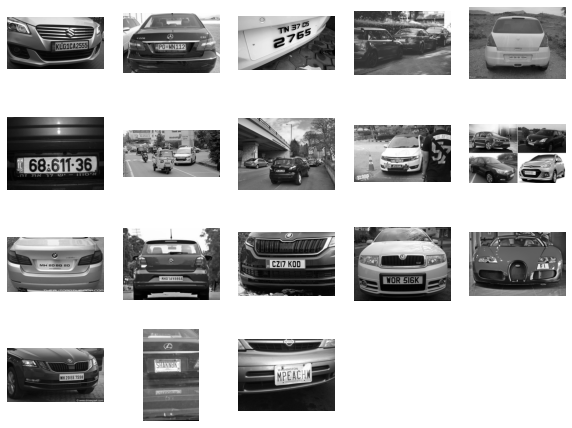

In [36]:
plt.figure(figsize=(10,20))

for i in range(0,18):
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X1[i])

In [37]:
def image_read(image1, image2, title1 = "", title2 = ""):
    fig = plt.figure(figsize = (15, 15))
    ax1 = fig.add_subplot(121)
    ax1.imshow(image1, cmap = "gray")
    ax1.set(xticks = [], yticks = [], title = title1)
    ax2 = fig.add_subplot(122)
    ax2.imshow(image2, cmap = "gray")
    ax2.set(xticks = [], yticks = [], title = title2)

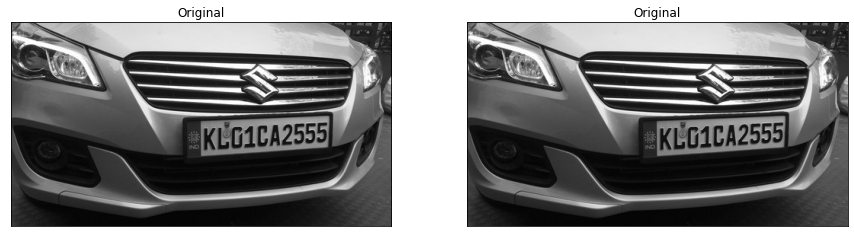

In [38]:
from skimage.io import imread
path = "/content/drive/MyDrive/Colab Notebooks/test/Cars0.png"
image = cv2.imread(path)
plot_image = image_read(image, image, title1 = "Original", title2 = "Original")


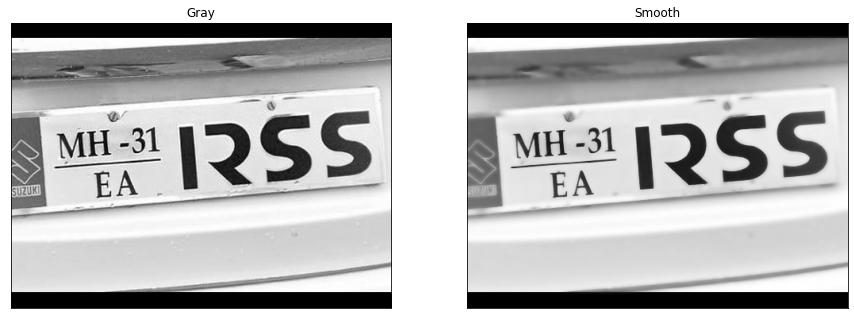

In [39]:
smooth = cv2.bilateralFilter(gray, 9, 75, 75)

image_read(gray, smooth, title1 = "Gray", title2 = "Smooth")

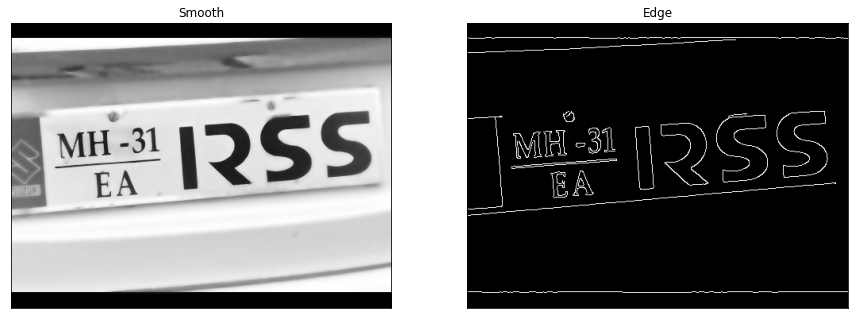

In [40]:
edge = cv2.Canny(smooth, 70, 400)
image_read(smooth, edge, title1 = "Smooth", title2 = "Edge")

In [41]:
model = Sequential()
model.add(VGG19(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 23,260,804
Trainable params: 3,236,420
Non

In [35]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
6/6 [==============================] - 226s 41s/step - loss: 0.0974 - accuracy: 0.3468 - val_loss: 0.0512 - val_accuracy: 0.4046
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 0.0664 - accuracy: 0.4335 

KeyboardInterrupt: ignored

In [42]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 49s 15s/step - loss: 0.0118 - accuracy: 0.7241


[0.011774559505283833, 0.7241379022598267]

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[:5]

array([[0.3828389 , 0.55003774, 0.26544285, 0.5260349 ],
       [0.3333641 , 0.59274375, 0.22196767, 0.5416019 ],
       [0.5122474 , 0.63403684, 0.34668732, 0.585064  ],
       [0.4776722 , 0.45025557, 0.34845972, 0.37337023],
       [0.5413155 , 0.63578427, 0.4069658 , 0.51862556]], dtype=float32)

NameError: ignored

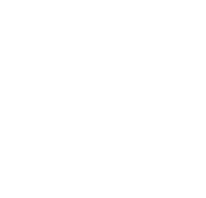

In [43]:
plt.figure(figsize=(20,40))
for i in range(20,40) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = predictions[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(255, 0, 0))
    plt.imshow(image)

In [44]:
pip install opencv-python

In [45]:
pip install imutils

In [46]:
pip install scikit-image

In [36]:
# import the necessary packages
! pip install imutils


In [37]:
!pip install easyocr

     |████████████████████████████████| 70.8 MB 11 kB/s 
     |████████████████████████████████| 47.6 MB 1.4 MB/s 


In [47]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

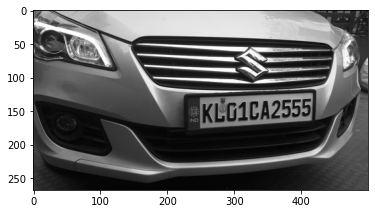

In [48]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/images/Cars0.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

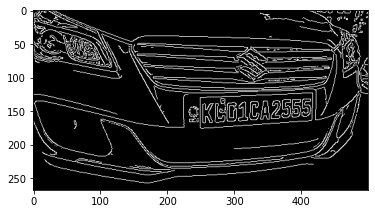

In [49]:

bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 100) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [50]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [51]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [52]:
location

array([[[417, 123]],

       [[249, 130]],

       [[249, 175]],

       [[415, 164]]], dtype=int32)

In [53]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

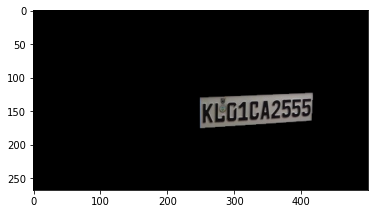

In [54]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [55]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

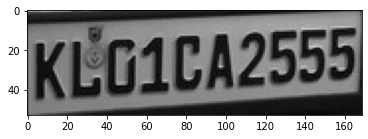

In [56]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [57]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 0], [169, 0], [169, 53], [0, 53]], 'KL01CA2555', 0.5244985964854458)]

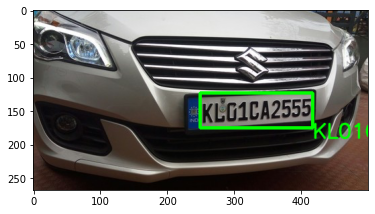

In [58]:
text = str.upper(result[0][1])
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [59]:
result[0][1]


'KL01CA2555'

In [65]:
import cv2
from os import listdir,makedirs
from os.path import isfile,join

def cropped_image(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
  edged = cv2.Canny(bfilter, 30, 100)
  keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = imutils.grab_contours(keypoints)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
  location = None
  for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
      location = approx
      break
  mask = np.zeros(gray.shape, np.uint8)
  new_image = cv2.drawContours(mask, [location], 0,255, -1)
  new_image = cv2.bitwise_and(img, img, mask=mask)
  (x,y) = np.where(mask==255)
  (x1, y1) = (np.min(x), np.min(y))
  (x2, y2) = (np.max(x), np.max(y))
  cropped_image = gray[x1:x2+1, y1:y2+1]
  reader = easyocr.Reader(['en'])
  result = reader.readtext(cropped_image)
  res1 = []
  res1.append(result[0][1])
  print(res1)



In [66]:
img_dir = r"/content/drive/MyDrive/Colab Notebooks/Images"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
for img in files:
  print(cropped_image(img))
